In [1]:
import os

In [2]:
import pandas as pd 
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
from sklearn.metrics.pairwise import cosine_similarity
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html

In [88]:
from wordcloud import WordCloud
from collections import Counter

# open data
---

In [4]:
os.listdir("./dataSet")

['genome_scores.csv',
 'genome_tags.csv',
 'link.csv',
 'movie.csv',
 'MovieLens 20M dataset.zip',
 'rating.csv',
 'tag.csv']

## movie 

In [5]:
data_movie = pd.read_csv("./dataSet/movie.csv")

In [6]:
data_movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


## rating

In [7]:
data_rating = pd.read_csv("./dataSet/rating.csv")

In [8]:
data_rating

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
20000258,138493,68954,4.5,2009-11-13 15:42:00
20000259,138493,69526,4.5,2009-12-03 18:31:48
20000260,138493,69644,3.0,2009-12-07 18:10:57
20000261,138493,70286,5.0,2009-11-13 15:42:24


user가 너무 많으므로 1000명으로 줄임 

In [9]:
data_rating_small = data_rating[data_rating['userId']<=1000]

In [10]:
data_rating_small

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40
...,...,...,...,...
150624,1000,88125,5.0,2012-01-03 00:53:12
150625,1000,88140,4.0,2012-01-03 00:53:51
150626,1000,88744,5.0,2012-01-03 00:53:47
150627,1000,90603,4.5,2012-01-03 00:53:28


---

# making rating matrix 

In [11]:
merges = pd.merge(data_rating_small,data_movie,on="movieId",how="left")

In [12]:
merges

,userId,movieId,rating,timestamp,title,genres
0,1,2,3.5,2005-04-02 23:53:47,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,2005-04-02 23:31:16,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,2005-04-02 23:33:39,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,2005-04-02 23:32:07,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,2005-04-02 23:29:40,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
150624,1000,88125,5.0,2012-01-03 00:53:12,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
150625,1000,88140,4.0,2012-01-03 00:53:51,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War
150626,1000,88744,5.0,2012-01-03 00:53:47,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller
150627,1000,90603,4.5,2012-01-03 00:53:28,Batman: Year One (2011),Action|Animation|Crime


In [13]:
merges.drop("timestamp",axis=1,inplace=True)

In [14]:
merges

,userId,movieId,rating,title,genres
0,1,2,3.5,Jumanji (1995),Adventure|Children|Fantasy
1,1,29,3.5,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
2,1,32,3.5,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,3.5,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,3.5,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...
150624,1000,88125,5.0,Harry Potter and the Deathly Hallows: Part 2 (...,Action|Adventure|Drama|Fantasy|Mystery|IMAX
150625,1000,88140,4.0,Captain America: The First Avenger (2011),Action|Adventure|Sci-Fi|Thriller|War
150626,1000,88744,5.0,Rise of the Planet of the Apes (2011),Action|Drama|Sci-Fi|Thriller
150627,1000,90603,4.5,Batman: Year One (2011),Action|Animation|Crime


In [15]:
rating_matrix= merges.pivot_table('rating', index = 'title', columns='userId')

In [16]:
rating_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Neath the Arizona Skies (1934),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Round Midnight (1986),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot (2004),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eXistenZ (1999),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
xXx (2002),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
rating_matrix = rating_matrix.fillna(0)

In [18]:
rating_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,991,992,993,994,995,996,997,998,999,1000
title,,,,,,,,,,,,,,,,,,,,,
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Neath the Arizona Skies (1934),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"\\""Great Performances\""\"" Cats (1998)""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## item based

In [19]:
'''
function : collaborative Filtering by item
input
    -item(str) : item name to be compared (movie name)
    -N(int) : default 10
              ordering nubmer
'''

def itembasedResult(item,N=10):
    #similarity
    rm = rating_matrix.copy(deep=True)
    sim_item = cosine_similarity(rm)

    #order
    title = rm.index.to_numpy()

    title_index = np.where(title==item)[0][0]

    ar = sim_item[title_index]

    order_index = np.argsort(-ar)

    result = []
    cnt = 1
    for i in order_index:
        if(cnt<=N):
            print(cnt,end="\t")
            print(i,end="\t")
            print(sim_item[title_index][i],end="\t")
            print(title[i])
            result.append([i,title[i]])
            cnt+=1
    #return result


In [20]:
itembasedResult("Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979)",50)

1	1628	1.0	Cat o' Nine Tails, The (Gatto a nove code, Il) (1971)
2	8936	1.0	Trip, The (1967)
3	1010	1.0	Beyond Re-Animator (2003)
4	8010	1.0	Society (1989)
5	8021	1.0	Soldier, The (1982)
6	2204	1.0	Danger: Diabolik (Diabolik) (1968)
7	966	1.0	Benny's Video (1992)
8	9557	1.0	Witchfinder General (Conquerer Worm, The) (1968)
9	2142	1.0	Cul-de-sac (1966)
10	9004	1.0	Twelve and Holding (2005)
11	1431	1.0	Brown Bunny, The (2003)
12	9029	1.0	Two Evil Eyes (1990)
13	2088	1.0	Crimewave (1985)
14	867	1.0	Bay of Blood (a.k.a. Twitch of the Death Nerve) (Reazione a catena) (1971)
15	3379	1.0	From Beyond (1986)
16	3405	1.0	Full Tilt Boogie (1997)
17	8594	1.0	Tess (1979)
18	4736	1.0	Johnson Family Vacation (2004)
19	8592	1.0	Terror, The (1963)
20	2032	1.0	Countess Dracula (1972)
21	8590	1.0	Terror Train (1980)
22	1471	1.0	Burial Ground (a.k.a. Zombie Horror) (a.k.a. Zombie 3) (Notti del Terrore, Le) (1981)
23	1018	1.0	Beyond, The (E tu vivrai nel terrore - L'aldilà) (1981)
24	7028	1.0	Pure Formality

## user based 

In [49]:
'''
function : collaborative Filtering by user
input
    -personId(INT) : user to be compared (userId)
'''

#- user id별 영화 추천 ordering list
def userbasedResult(personId):
    rm = rating_matrix.copy(deep=True)
    #cos sim  by user
    sim_user = cosine_similarity(rm.T)
    
    #rating_matrix with weight​ (ppt 방식)
        #- 처리 편하게 하기위해서 (x축 -> id , y축 -> 영화 ) === ppt 그림 형식
    rating_np = rm.to_numpy()
    rating_np = rating_np.T

    for i in range(len(sim_user)):
        for j in range(len(rating_np[0])):
            rating_np[i][j] = rating_np[i][j]*sim_user[personId-1][i]
    #다시 제자리로
    rating_np = rating_np.T
    print(rm[20].sort_values())
    person_rating = pd.DataFrame(rating_np)
    person_rating.index = rating_matrix.index
    person_rating.columns = rating_matrix.columns

    #결과
    movie_rating = pd.DataFrame(person_rating.sum(axis=1))
    movie_rating.columns = [personId]

    #결과(ordering) 
    movie_rating = movie_rating.sort_values(by=[20],ascending=False)
    return movie_rating

    

In [50]:
userbasedResult(20)

title
'Hellboy': The Seeds of Creation (2004)    0.0
One True Thing (1998)                      0.0
One Week (2008)                            0.0
One, The (2001)                            0.0
One, Two, Three (1961)                     0.0
                                          ... 
Poltergeist (1982)                         4.0
Casino (1995)                              4.0
Taxi Driver (1976)                         4.5
Apocalypse Now (1979)                      4.5
Fear and Loathing in Las Vegas (1998)      5.0
Name: 20, Length: 9744, dtype: float64


,20
title,
Pulp Fiction (1994),164.171956
"Matrix, The (1999)",157.086046
"Shawshank Redemption, The (1994)",146.578877
"Silence of the Lambs, The (1991)",142.185982
Forrest Gump (1994),137.926438
...,...
Leap Year (2010),0.000000
"Living Dead Girl, The (Morte Vivante, La) (1982)",0.000000
All Quiet on the Western Front (1979),0.000000


## visualize result 

In [105]:
movie_rating = userbasedResult(20)

title
'Hellboy': The Seeds of Creation (2004)    0.0
One True Thing (1998)                      0.0
One Week (2008)                            0.0
One, The (2001)                            0.0
One, Two, Three (1961)                     0.0
                                          ... 
Poltergeist (1982)                         4.0
Casino (1995)                              4.0
Taxi Driver (1976)                         4.5
Apocalypse Now (1979)                      4.5
Fear and Loathing in Las Vegas (1998)      5.0
Name: 20, Length: 9744, dtype: float64


In [57]:
rating_matrix[:][20][rating_matrix[:][20] > 0]

title
Ace Ventura: When Nature Calls (1995)            2.5
Apocalypse Now (1979)                            4.5
Back to the Future Part III (1990)               3.5
Blair Witch Project, The (1999)                  4.0
Casino (1995)                                    4.0
Demolition Man (1993)                            2.0
Ed Wood (1994)                                   3.5
Fear and Loathing in Las Vegas (1998)            5.0
Godfather: Part II, The (1974)                   4.0
Godfather: Part III, The (1990)                  4.0
Honey, I Shrunk the Kids (1989)                  2.5
In the Line of Fire (1993)                       2.0
Indiana Jones and the Last Crusade (1989)        4.0
Indiana Jones and the Temple of Doom (1984)      3.5
Lord of the Rings: The Two Towers, The (2002)    3.5
Matrix, The (1999)                               4.0
Monty Python's Life of Brian (1979)              4.0
Monty Python's The Meaning of Life (1983)        3.5
Naked Gun 33 1/3: The Final Insult (1994

In [94]:
user_title = pd.DataFrame(rating_matrix[:][20][rating_matrix[:][20] > 0].index)

In [95]:
user_title

,title
0,Ace Ventura: When Nature Calls (1995)
1,Apocalypse Now (1979)
2,Back to the Future Part III (1990)
3,"Blair Witch Project, The (1999)"
4,Casino (1995)
5,Demolition Man (1993)
6,Ed Wood (1994)
7,Fear and Loathing in Las Vegas (1998)
8,"Godfather: Part II, The (1974)"
9,"Godfather: Part III, The (1990)"


In [96]:
user_merge = pd.merge(user_title,data_movie,on="title",how="left")

In [97]:
user_merge

,title,movieId,genres
0,Ace Ventura: When Nature Calls (1995),19,Comedy
1,Apocalypse Now (1979),1208,Action|Drama|War
2,Back to the Future Part III (1990),2012,Adventure|Comedy|Sci-Fi|Western
3,"Blair Witch Project, The (1999)",2710,Drama|Horror|Thriller
4,Casino (1995),16,Crime|Drama
5,Demolition Man (1993),442,Action|Adventure|Sci-Fi
6,Ed Wood (1994),235,Comedy|Drama
7,Fear and Loathing in Las Vegas (1998),1884,Adventure|Comedy|Drama
8,"Godfather: Part II, The (1974)",1221,Crime|Drama
9,"Godfather: Part III, The (1990)",2023,Crime|Drama|Mystery|Thriller


In [98]:
user_tag = []
for i in range(len(user_merge["genres"])):
    print(user_merge["genres"][i])
    user_tag= user_tag+(user_merge["genres"][i].split("|"))

Comedy
Action|Drama|War
Adventure|Comedy|Sci-Fi|Western
Drama|Horror|Thriller
Crime|Drama
Action|Adventure|Sci-Fi
Comedy|Drama
Adventure|Comedy|Drama
Crime|Drama
Crime|Drama|Mystery|Thriller
Adventure|Children|Comedy|Fantasy|Sci-Fi
Action|Thriller
Action|Adventure
Action|Adventure|Fantasy
Adventure|Fantasy
Action|Sci-Fi|Thriller
Comedy
Comedy
Action|Comedy
Action|Crime|Thriller
Horror|Thriller
Drama
Comedy|Horror
Adventure|Animation|Children|Comedy|Fantasy|Romance
Drama|Mystery|Thriller
Crime|Drama|Thriller
Comedy|Romance
Adventure|Animation|Children|Comedy|Crime|Fantasy|Mystery


In [99]:
user_tag

['Comedy',
 'Action',
 'Drama',
 'War',
 'Adventure',
 'Comedy',
 'Sci-Fi',
 'Western',
 'Drama',
 'Horror',
 'Thriller',
 'Crime',
 'Drama',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Drama',
 'Adventure',
 'Comedy',
 'Drama',
 'Crime',
 'Drama',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Adventure',
 'Children',
 'Comedy',
 'Fantasy',
 'Sci-Fi',
 'Action',
 'Thriller',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Fantasy',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Thriller',
 'Drama',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Fantasy',
 'Mystery']

In [100]:
user_count = Counter(user_tag)

In [101]:
user_count

Counter({'Comedy': 12,
         'Action': 8,
         'Drama': 10,
         'War': 1,
         'Adventure': 9,
         'Sci-Fi': 4,
         'Western': 1,
         'Horror': 3,
         'Thriller': 8,
         'Crime': 6,
         'Mystery': 3,
         'Children': 3,
         'Fantasy': 5,
         'Animation': 2,
         'Romance': 2})

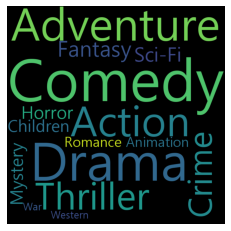

In [130]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(user_count)
plt.figure()
plt.imshow(gen)
plt.axis('off')
plt.savefig("result/user_tag.jpg")

In [120]:
result_movie = movie_rating[movie_rating  > 50].dropna(axis=0)

In [121]:
result_movie

,20
title,
Pulp Fiction (1994),164.171956
"Matrix, The (1999)",157.086046
"Shawshank Redemption, The (1994)",146.578877
"Silence of the Lambs, The (1991)",142.185982
Forrest Gump (1994),137.926438
...,...
Platoon (1986),50.913048
"Graduate, The (1967)",50.802962
Airplane! (1980),50.380757


In [123]:
result_merge = pd.merge(result_movie,data_movie,on="title",how="left")

In [124]:
result_merge

,title,20,movieId,genres
0,Pulp Fiction (1994),164.171956,296,Comedy|Crime|Drama|Thriller
1,"Matrix, The (1999)",157.086046,2571,Action|Sci-Fi|Thriller
2,"Shawshank Redemption, The (1994)",146.578877,318,Crime|Drama
3,"Silence of the Lambs, The (1991)",142.185982,593,Crime|Horror|Thriller
4,Forrest Gump (1994),137.926438,356,Comedy|Drama|Romance|War
...,...,...,...,...
147,Platoon (1986),50.913048,1090,Drama|War
148,"Graduate, The (1967)",50.802962,1247,Comedy|Drama|Romance
149,Airplane! (1980),50.380757,2791,Comedy
150,"Lock, Stock & Two Smoking Barrels (1998)",50.271727,2542,Comedy|Crime|Thriller


In [125]:
result_tag = []
for i in range(len(user_merge["genres"])):
    print(result_merge["genres"][i])
    result_tag= result_tag+(result_merge["genres"][i].split("|"))

Comedy|Crime|Drama|Thriller
Action|Sci-Fi|Thriller
Crime|Drama
Crime|Horror|Thriller
Comedy|Drama|Romance|War
Action|Adventure|Sci-Fi
Action|Adventure|Sci-Fi
Action|Adventure
Comedy|Drama
Action|Crime|Drama|Thriller
Crime|Drama
Crime|Mystery|Thriller
Action|Drama|War
Drama|War
Action|Sci-Fi
Adventure|Fantasy
Action|Adventure|Sci-Fi
Adventure|Comedy|Sci-Fi
Drama|Horror|Mystery
Adventure|Fantasy
Action|Adventure
Action|Adventure|Sci-Fi|Thriller
Mystery|Thriller
Adventure|Comedy|Fantasy
Comedy|Crime|Drama|Thriller
Action|Drama|War
Adventure|Animation|Children|Comedy|Fantasy|Romance
Crime|Drama
Adventure|Animation|Children|Comedy|Fantasy
Mystery|Thriller
Mystery|Sci-Fi|Thriller
Action|Sci-Fi|Thriller
Action|Adventure|Drama|Fantasy
Thriller
Crime|Mystery|Thriller
Action|Adventure|Drama
Action|Sci-Fi|Thriller
Action|Comedy|Sci-Fi
Action|Adventure|Comedy|Fantasy|Romance
Horror|Sci-Fi
Drama
Action|Drama|War
Action|Crime|Thriller
Crime|Drama
Comedy|Fantasy|Romance
Adventure|Drama|IMAX
Crime|Dra

In [126]:
result_tag

['Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Sci-Fi',
 'Thriller',
 'Crime',
 'Drama',
 'Crime',
 'Horror',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'War',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Drama',
 'Action',
 'Crime',
 'Drama',
 'Thriller',
 'Crime',
 'Drama',
 'Crime',
 'Mystery',
 'Thriller',
 'Action',
 'Drama',
 'War',
 'Drama',
 'War',
 'Action',
 'Sci-Fi',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Comedy',
 'Sci-Fi',
 'Drama',
 'Horror',
 'Mystery',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Thriller',
 'Mystery',
 'Thriller',
 'Adventure',
 'Comedy',
 'Fantasy',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Action',
 'Drama',
 'War',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Crime',
 'Drama',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Mystery',
 '

In [127]:
result_count = Counter(result_tag)

In [128]:
result_count

Counter({'Comedy': 59,
         'Crime': 36,
         'Drama': 58,
         'Thriller': 39,
         'Action': 54,
         'Sci-Fi': 31,
         'Horror': 9,
         'Romance': 25,
         'War': 8,
         'Adventure': 48,
         'Mystery': 12,
         'Fantasy': 22,
         'Animation': 11,
         'Children': 16,
         'IMAX': 4,
         'Film-Noir': 1,
         'Western': 3,
         'Musical': 6})

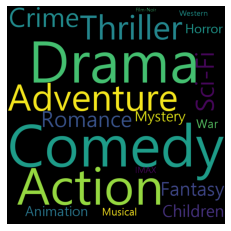

In [131]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(result_count)
plt.figure()
plt.imshow(gen)
plt.axis('off')
plt.savefig("result/result_tag.jpg")